# Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
SEED=4242
rnd.seed(10)
SIZE=30000
ALPHA=0.03

In [2]:
df= pd.read_csv('/content/DFORE394.csv', low_memory=False)

In [3]:
df.columns

Index(['user_type', 'transactor_id', 'locations_count', 'total_vends',
       'Total_VDPM', 'AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends',
       'WalletLoad_Recency', 'Vend_Recency', 'MostRecentWalletLoadDate',
       'MostRecentVendDate', 'FirstWalletLoadDate', 'FirstVendDate',
       'Vend_DaysonBook', 'WalletLoad_DaysonBook', 'Vend_FrequencyLast30Days',
       'WalletLoad_FrequencyLast30Days', 'WalletLoadAmountLast30Days',
       'MoneyLast30Days', 'Vend_FrequencyLast60Days',
       'WalletLoad_FrequencyLast60Days', 'WalletLoadAmountLast60Days',
       'MoneyLast60Days', 'Vend_FrequencyLast90Days',
       'WalletLoad_FrequencyLast90Days', 'WalletLoadAmountLast90Days',
       'MoneyLast90Days', 'Vend_FrequencyLast120Days',
       'WalletLoad_FrequencyLast120Days', 'WalletLoadAmountLast120Days',
       'MoneyLast120Days', 'Vend_FrequencyLast180Days',
       'WalletLoad_FrequencyLast180Days', 'WalletLoadAmountLast180Days',
       'MoneyLast180Days'],
      dtype='object')

## Variables

In [4]:
df.set_index('transactor_id', inplace= True)

In [5]:
df['NomadFlg']= np.where(df.locations_count==1, False, True)

In [6]:
cols= ['NomadFlg', 'AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends',
       'WalletLoad_Recency', 'Vend_Recency',
       'Vend_DaysonBook', 'WalletLoad_DaysonBook', 'Vend_FrequencyLast180Days',
       'WalletLoad_FrequencyLast180Days', 'WalletLoadAmountLast180Days']

In [7]:
df=df.loc[np.min(df.loc[:,['AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends']]!=0, axis=1), cols]

In [8]:
df.index

Index(['google-oauth2|112872581275891852293',
       'google-oauth2|116615156989069358636',
       'apple|001068.a4da174bb39a423c81f5d381f3593692.2155',
       'google-oauth2|109966030683590479063', 'auth0|620fc4bd64ce69006fd438e0',
       'auth0|61bfdb43fdd15e0069358a6e', 'auth0|6170a1ac07a59e0077363ae7',
       'apple|000653.444b453001504c438c9557171d6b93c7.0009',
       'apple|000521.8917dd8ff3f04af3b381fdd91f11ff4f.1936',
       'apple|001059.598ccdb81ec34af08239d471e6cabee8.1848',
       ...
       'auth0|60f831973953db0069d5a464', 'google-oauth2|102239660070896252322',
       'apple|002021.dbd16e07c2654d03b16a982238edee0d.2353',
       'auth0|620d743538eba50068ea9209', 'google-oauth2|103589794464085853848',
       'auth0|6202c9c0c296ad0069c3ed30', 'google-oauth2|117191895617623899585',
       'google-oauth2|103636639685974989195', 'auth0|61fc9746cc6dfb006c610b41',
       'apple|001741.bd78228dc6ae4da88125dea65271846f.2039'],
      dtype='object', name='transactor_id', length=1164

In [9]:
fl=df[cols[1:]] < df[cols[1:]].quantile(.95)

In [10]:
df1= df.loc[fl.min(axis=1)]

In [11]:
df1.describe()

,AvgDaysBetweenWalletLoad,AvgDaysBetweenVends,WalletLoad_Recency,Vend_Recency,Vend_DaysonBook,WalletLoad_DaysonBook,Vend_FrequencyLast180Days,WalletLoad_FrequencyLast180Days,WalletLoadAmountLast180Days
count,85211.000000,85211.00000,85211.000000,85211.000000,85211.000000,85211.000000,85211.000000,85211.000000,85211.000000
mean,11.221532,2.62452,20.283050,14.431435,76.113014,54.366572,31.299128,4.724073,12.420421
std,6.708749,1.54486,20.664399,18.308463,45.763788,38.803662,19.842309,2.663832,18.877639
min,1.000000,1.00000,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,0.000000
25%,6.000000,1.00000,6.000000,3.000000,39.000000,25.000000,16.000000,3.000000,0.000000
50%,10.000000,2.00000,14.000000,7.000000,67.000000,44.000000,26.000000,4.000000,0.000000
75%,15.000000,3.00000,27.000000,17.000000,106.000000,73.000000,42.000000,6.000000,20.000000
max,33.000000,7.00000,112.000000,99.000000,213.000000,188.000000,104.000000,13.000000,89.750000


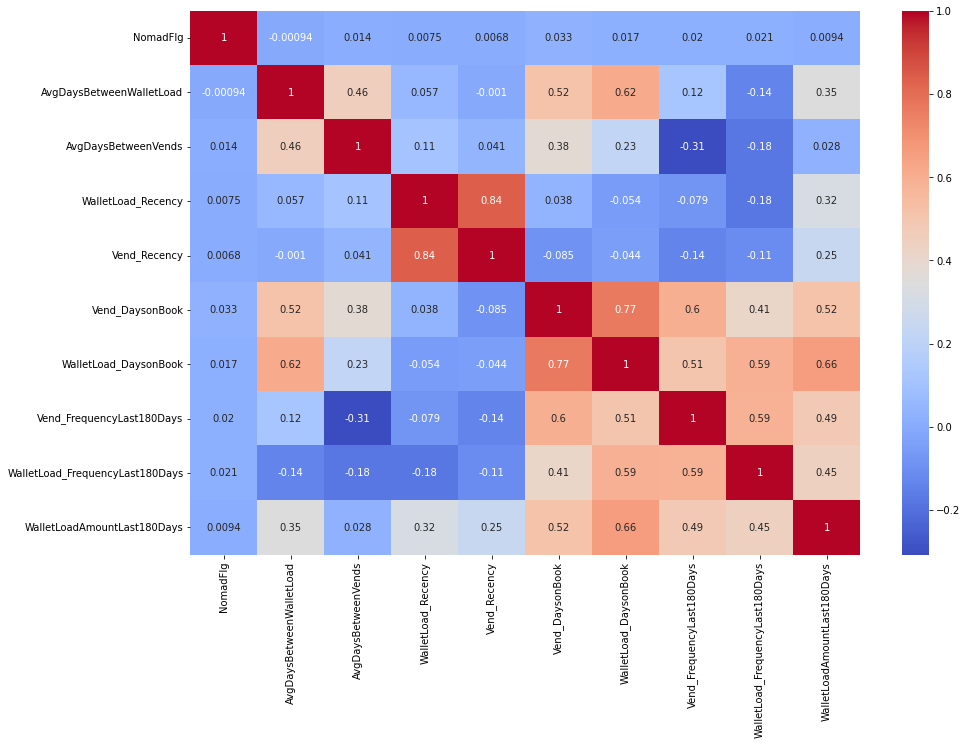

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), fmt='.2g',cmap='coolwarm', annot= True)

In [13]:
df1.head()

,NomadFlg,AvgDaysBetweenWalletLoad,AvgDaysBetweenVends,WalletLoad_Recency,Vend_Recency,Vend_DaysonBook,WalletLoad_DaysonBook,Vend_FrequencyLast180Days,WalletLoad_FrequencyLast180Days,WalletLoadAmountLast180Days
transactor_id,,,,,,,,,,
google-oauth2|112872581275891852293,False,32,6,53,52,132,131,19,3,30.0
google-oauth2|116615156989069358636,False,9,2,0,0,66,66,34,7,5.0
apple|001068.a4da174bb39a423c81f5d381f3593692.2155,False,22,3,3,2,183,182,69,7,50.0
google-oauth2|109966030683590479063,False,8,2,21,21,92,52,50,6,20.0
auth0|620fc4bd64ce69006fd438e0,False,9,1,15,3,31,19,24,2,0.0


# K Means Modeling

## Scaling

In [14]:
mms = MinMaxScaler()
mms.fit(df1)
data_transformed = mms.transform(df1)

## Train/ Test 

In [15]:
train, test = train_test_split(data_transformed, test_size=0.2, random_state=4242)

## Choice of clusters

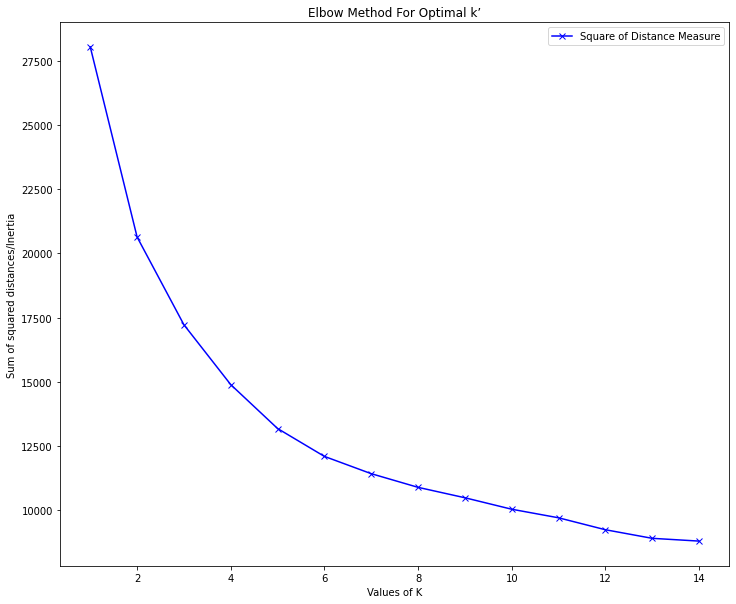

In [16]:
Sum_of_squared_distances = []
plt.figure(figsize=(12,10))
K = range(1,15)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(train)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-', label= 'Square of Distance Measure')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.legend()
plt.title('Elbow Method For Optimal k’')
plt.show()

In [17]:
range_n_clusters = range(2,6)
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(train)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(train, cluster_labels))
 clear_output(wait=True)
 print('Calculated for ', num_clusters)

Calculated for  5


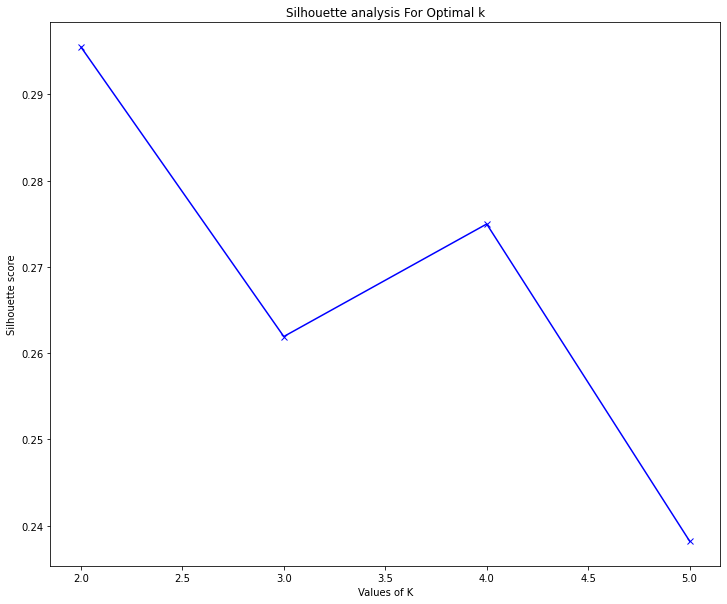

In [18]:
plt.figure(figsize=(12,10))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

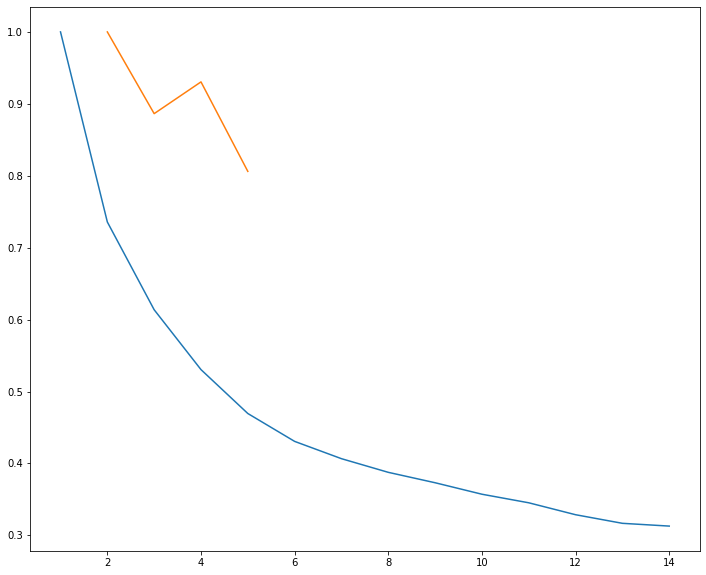

In [19]:
plt.figure(figsize=(12,10))
plt.plot(K,np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0])
plt.plot(range_n_clusters,np.array(silhouette_avg)/silhouette_avg[0])

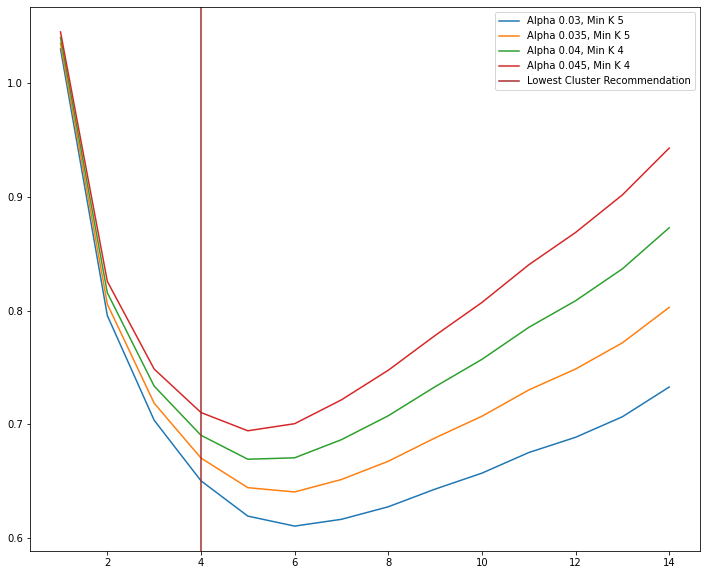

In [20]:
lminIdx=99999
plt.figure(figsize=(12,10))
for a in [.03,.035,.040, .045]:
  modified_intertia= np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0]+a*np.array([i+1 for i in range(len(Sum_of_squared_distances))])
  minIdx= np.argmin(modified_intertia)
  if lminIdx > minIdx:
    lminIdx= minIdx
  plt.plot(K, modified_intertia, label='Alpha {}, Min K {}'.format(a, minIdx))
plt.axvline(lminIdx, label= 'Lowest Cluster Recommendation', color= 'brown')
plt.legend()

## K Means Fit

In [21]:
km = KMeans(n_clusters=lminIdx)
km = km.fit(train)
cluster_labels = km.labels_

# Result & Insights

## Train

In [22]:
pca = PCA(n_components=2)
pca.fit(train)

PCA(n_components=2)

In [23]:
df3= pd.DataFrame(pca.fit_transform(train))
df3.columns= ['PCA_1', 'PCA_2']

In [24]:
df3['cluster']= cluster_labels

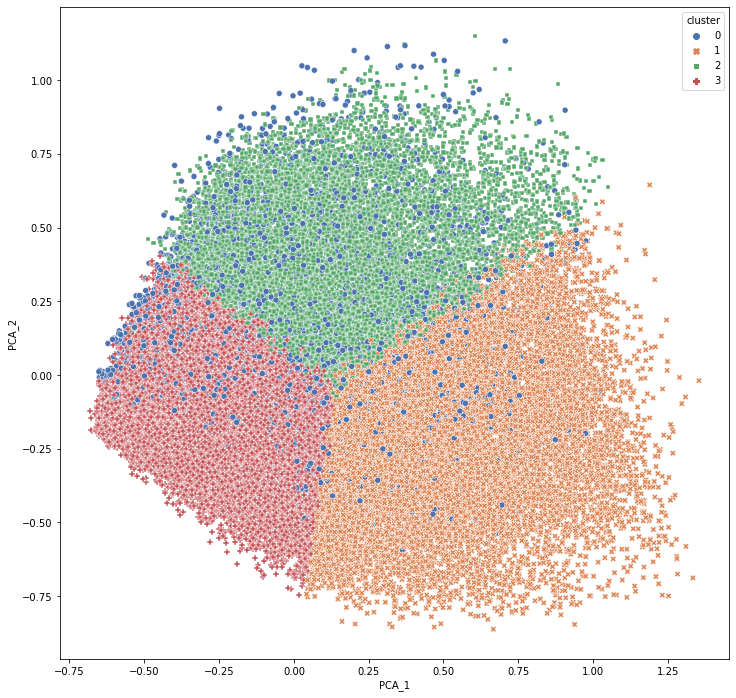

In [25]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df3, x="PCA_1", y="PCA_2", hue="cluster", style= 'cluster', palette="deep")

In [26]:
weights = pca.components_

In [27]:
df4=pd.DataFrame({
    'columns': list(df1.columns),
    'Weight1': list(weights[0]),
    'Weight2': list(weights[1])
})

In [28]:
df4['norm']= np.sqrt(df4.Weight1**2+ df4.Weight2**2)

In [29]:
df4.sort_values(by='norm', inplace= True, ascending= False)

In [30]:
df4

,columns,Weight1,Weight2,norm
2,AvgDaysBetweenVends,0.182799,0.702976,0.726354
8,WalletLoad_FrequencyLast180Days,0.339108,-0.425312,0.543952
5,Vend_DaysonBook,0.491186,0.083711,0.498268
6,WalletLoad_DaysonBook,0.496457,-0.005837,0.496492
1,AvgDaysBetweenWalletLoad,0.312723,0.364011,0.479896
7,Vend_FrequencyLast180Days,0.323403,-0.347193,0.474482
9,WalletLoadAmountLast180Days,0.401153,-0.067070,0.406721
3,WalletLoad_Recency,0.020942,0.193756,0.194884
4,Vend_Recency,-0.008010,0.151009,0.151221
0,NomadFlg,0.006719,0.001447,0.006873


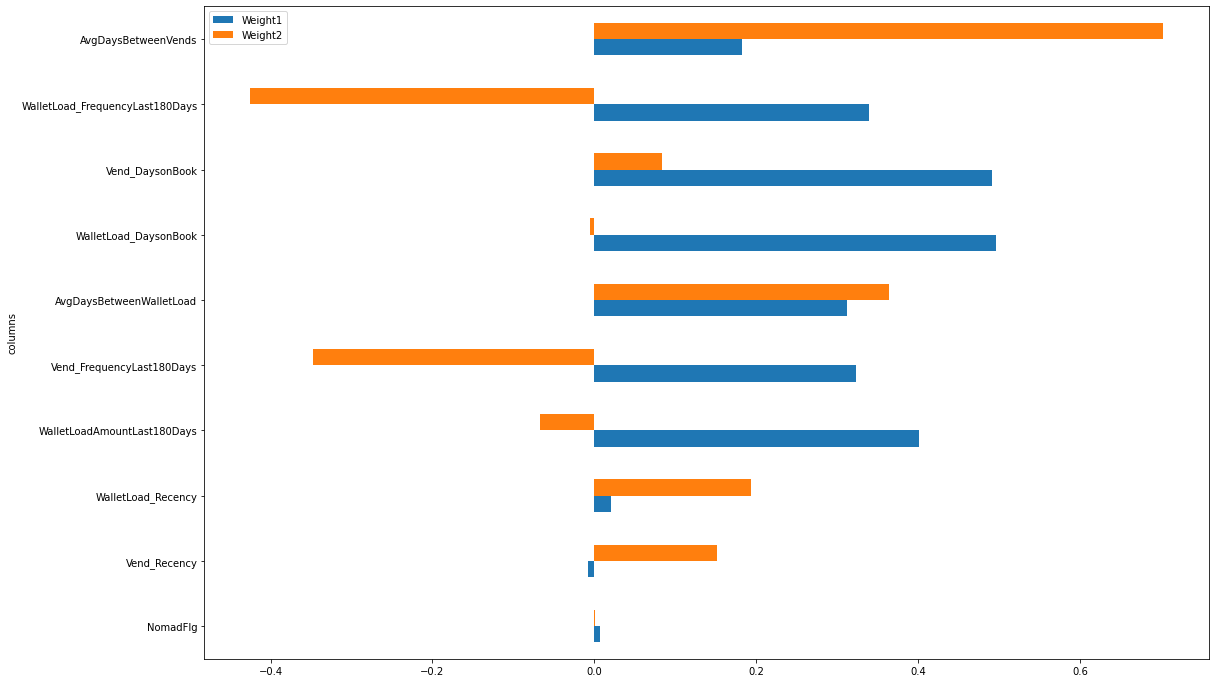

In [31]:
# plt.figure(figsize=(18,12))
df4.sort_values('norm', ascending=True).plot(x="columns", y=["Weight1", "Weight2"], kind="barh", figsize=(18,12))

Text(0, 0.5, 'PC 2')

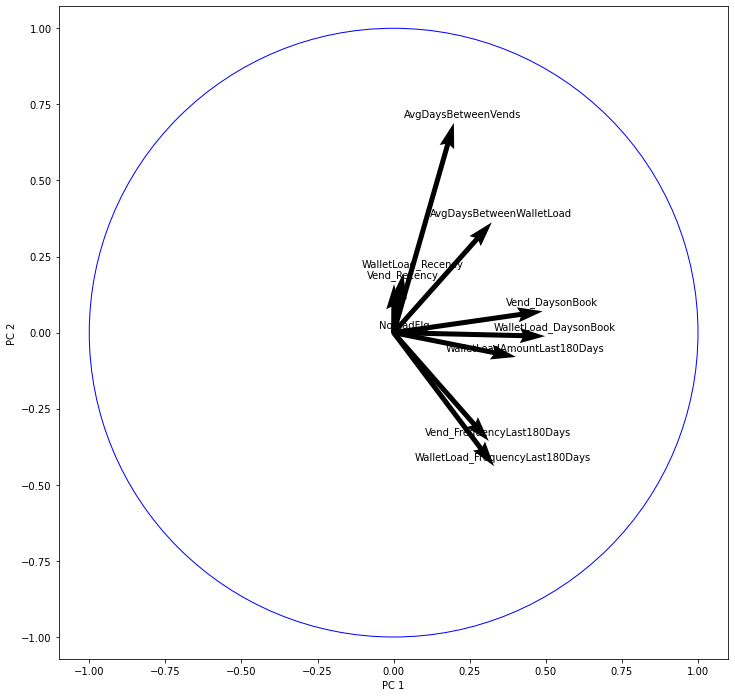

In [46]:
PCs = pca.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(12,12))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
# feature_names = np.arange(PCs.shape[1])
feature_names= cols
for i,j,z in zip(PCs[1,:]+0.03, PCs[0,:]+0.03, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='blue')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

# Label axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

## Test

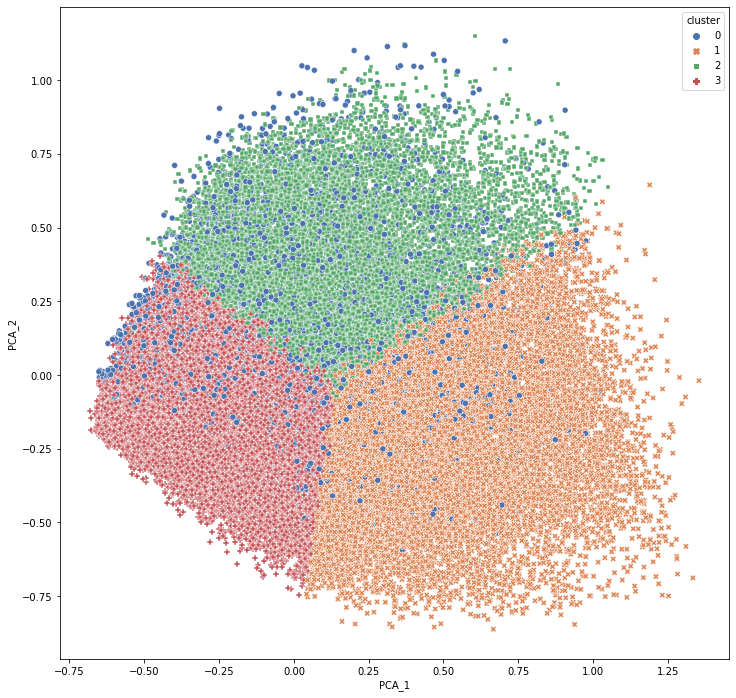

In [32]:
df4= pd.DataFrame(pca.fit_transform(test))
df4.columns= ['PCA_1', 'PCA_2']
df3['cluster']= cluster_labels
plt.figure(figsize=(12,12))
sns.scatterplot(data=df3, x="PCA_1", y="PCA_2", hue="cluster", style= 'cluster', palette="deep")